### Часть 1. Обработка табличных данных в Pandas. Подготовка данных.

## Задание 1 
Даны файлы orders.csv и products.csv. 
- Определите число уникальных продуктов в каждой категории.
- Выведите все продукты в категории "Морепродукты".
- Выведите график числа заказов за каждый прошедший месяц.
- Заведите столбец "OrderSum" (сколько было оплачено за продукт по заказу, с учётом его количества, стоимости единицы товара и скидки). Определите самые дорогие заказы (сгруппировав по OrderID)
- Определите продукты с максимальной стоимостью за шт. (не за единицу товара)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
opTable = pd.merge(orders,products, how = 'inner', on = 'ProductID')
print(opTable.head())

   OrderID   OrderDate  ProductID  UnitPrice_x  Quantity  Discount  \
0    10248  2007-01-30         11        28.62        12       0.0   
1    10296  2004-02-02         11        26.62        12       0.0   
2    10327  2004-07-08         11        29.10        50       0.2   
3    10353  2007-06-11         11        29.75        12       0.2   
4    10365  2004-06-24         11        29.48        24       0.0   

  ProductName  QuantityPerUnit  UnitCost  UnitPrice_y CategoryName  
0        Киви               25      21.1         28.0       Фрукты  
1        Киви               25      21.1         28.0       Фрукты  
2        Киви               25      21.1         28.0       Фрукты  
3        Киви               25      21.1         28.0       Фрукты  
4        Киви               25      21.1         28.0       Фрукты  


#### Число уникальных продуктов в каждой категории:

In [3]:
print(opTable.groupby(by='CategoryName')['ProductName'].count())

CategoryName
Кондитерские изделия    561
Крупы                    98
Молочные продукты       122
Морепродукты            157
Мясо/Птица              199
Овощи                   355
Приправы                318
Фрукты                  362
Name: ProductName, dtype: int64


#### Все продукты в категории "Морепродукты".

In [4]:
print(opTable[opTable['CategoryName'] == 'Морепродукты'])

      OrderID   OrderDate  ProductID  UnitPrice_x  Quantity  Discount  \
130     10249  2006-01-29         51       101.20        40      0.00   
131     10250  2007-02-03         51        97.67        35      0.15   
132     10291  2004-03-24         51       106.56         2      0.10   
133     10335  2005-11-16         51       104.29        48      0.20   
134     10362  2004-06-22         51       109.79        20      0.00   
...       ...         ...        ...          ...       ...       ...   
2167    10515  2004-12-18          9        42.05        16      0.15   
2168    10687  2006-04-26          9        41.17        50      0.25   
2169    10693  2006-05-02          9        35.30         6      0.00   
2170    10848  2007-06-21          9        40.32         3      0.00   
2171    11083  2006-06-16          9        38.90         5      0.00   

     ProductName  QuantityPerUnit  UnitCost  UnitPrice_y  CategoryName  
130        Мидии               10     82.74       

#### График числа заказов за каждый прошедший месяц.

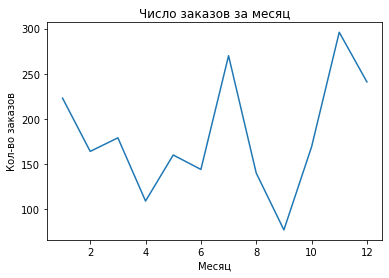

In [5]:
opT = opTable.copy()
opT.index = pd.to_datetime(opTable['OrderDate'])
opT.groupby(by=[opT.index.month])['Quantity'].count().plot()
plt.title('Число заказов за месяц')
plt.ylabel('Кол-во заказов')
plt.xlabel('Месяц')
plt.show()

#### Cтолбец "OrderSum" (сколько было оплачено за продукт по заказу, с учётом его количества, стоимости единицы товара и скидки).

In [6]:
opTable['OrderSum'] = np.where(opTable['UnitPrice_x']<opTable['UnitPrice_y'],
                              opTable['Quantity']*opTable['QuantityPerUnit']*opTable['UnitPrice_x']*(1 - opTable['Discount']),
                              opTable['Quantity']*opTable['QuantityPerUnit']*opTable['UnitPrice_y']*(1 - opTable['Discount']))
print(opTable)

      OrderID   OrderDate  ProductID  UnitPrice_x  Quantity  Discount  \
0       10248  2007-01-30         11        28.62        12      0.00   
1       10296  2004-02-02         11        26.62        12      0.00   
2       10327  2004-07-08         11        29.10        50      0.20   
3       10353  2007-06-11         11        29.75        12      0.20   
4       10365  2004-06-24         11        29.48        24      0.00   
...       ...         ...        ...          ...       ...       ...   
2167    10515  2004-12-18          9        42.05        16      0.15   
2168    10687  2006-04-26          9        41.17        50      0.25   
2169    10693  2006-05-02          9        35.30         6      0.00   
2170    10848  2007-06-21          9        40.32         3      0.00   
2171    11083  2006-06-16          9        38.90         5      0.00   

     ProductName  QuantityPerUnit  UnitCost  UnitPrice_y  CategoryName  \
0           Киви               25      21.1      

#### Продукты с максимальной стоимостью за шт. (не за единицу товара)

In [7]:
print(opTable.groupby(by= 'ProductName')['UnitCost'].max())

ProductName
Абрикос                   3.90
Ананас                   24.98
Апельсин                 16.17
Бадьян                   37.17
Баклажан                 62.38
                         ...  
Чеснок                    8.68
Чупа-Чупс                 6.69
Шоколад Молочное Чудо    25.39
Шоколад Снежинка         22.24
Яблоко                    4.72
Name: UnitCost, Length: 77, dtype: float64


## Задание 2.

#### 1) Для каждой категории продуктов выведите средний доход от продаж. (OrderSum)

In [8]:
print(opTable.groupby(by = 'CategoryName')["OrderSum"].mean())

CategoryName
Кондитерские изделия     8709.100693
Крупы                   17404.622455
Молочные продукты        2840.062750
Морепродукты            15255.808328
Мясо/Птица              10097.960198
Овощи                    9794.782531
Приправы                 5428.101313
Фрукты                   6217.679206
Name: OrderSum, dtype: float64


#### 2) Введите столбец "Profit" - разность между доходами и приблизительной закупочной стоимостью проданных товаров.

In [9]:
opTable['Profit'] = opTable['OrderSum'] - opTable['Quantity']*opTable['QuantityPerUnit']*opTable['UnitCost']
print(opTable)

      OrderID   OrderDate  ProductID  UnitPrice_x  Quantity  Discount  \
0       10248  2007-01-30         11        28.62        12      0.00   
1       10296  2004-02-02         11        26.62        12      0.00   
2       10327  2004-07-08         11        29.10        50      0.20   
3       10353  2007-06-11         11        29.75        12      0.20   
4       10365  2004-06-24         11        29.48        24      0.00   
...       ...         ...        ...          ...       ...       ...   
2167    10515  2004-12-18          9        42.05        16      0.15   
2168    10687  2006-04-26          9        41.17        50      0.25   
2169    10693  2006-05-02          9        35.30         6      0.00   
2170    10848  2007-06-21          9        40.32         3      0.00   
2171    11083  2006-06-16          9        38.90         5      0.00   

     ProductName  QuantityPerUnit  UnitCost  UnitPrice_y  CategoryName  \
0           Киви               25      21.1      

#### 3) Найдите по убыванию суммарной прибыли категории товаров, обеспечивающие её 80 процентов. Выведите аналогичные данные только за 2005 и 2006 год.

In [10]:
profitSum = opTable['Profit'].sum()
print(profitSum)

1780532.3606728408


In [11]:
opT = opTable.groupby(by = 'CategoryName')['Profit'].sum() / profitSum
print(opT.sort_values())

CategoryName
Молочные продукты       0.021175
Мясо/Птица              0.089518
Приправы                0.091549
Фрукты                  0.097989
Морепродукты            0.107818
Крупы                   0.111922
Кондитерские изделия    0.235817
Овощи                   0.244212
Name: Profit, dtype: float64


In [12]:
print('80% profit categories: \n')
sum = 0
for i in range(len(opT)):
    sum += opT[i]
    if(sum <= 0.8):
        print(opT.index[i] + ' - ' + str(opT[i]))


80% profit categories: 

Кондитерские изделия - 0.23581743759768728
Крупы - 0.11192170664965735
Молочные продукты - 0.02117549017792868
Морепродукты - 0.10781818498465101
Мясо/Птица - 0.0895180525518051


#### 4) *Введите интегральный показатель, оценивающий насколько хорошо растут продажи в выборке данных из таблицы. Обоснуйте выбор показателя и сравните категории по нему.

## Задание 3 Для датасета California Housing:


#### 1)Разбейте датасет на тренировочную, валидационную и тестовую выборку

In [13]:
housing = pd.read_csv('housing.csv')
print(housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [15]:
from sklearn.model_selection import train_test_split

In [18]:
train_val, test = train_test_split(housing, test_size = 0.2)
train, val = train_test_split(train_val, test_size= 0.2)
print(train.shape,val.shape,test.shape)

(13209, 10) (3303, 10) (4128, 10)


#### 2) Проведите преобразование категориального признака ocean_proximity через OneHot или Dummy-кодировку

In [19]:
housing_dummy = pd.get_dummies(train,columns = ['ocean_proximity'])
print(housing_dummy)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
10238    -117.88     33.90                21.0       3180.0           434.0   
12343    -116.52     33.85                13.0       7559.0          1444.0   
20597    -121.58     39.16                33.0       1897.0           378.0   
9786     -121.00     35.94                16.0       3077.0           628.0   
9623     -120.31     37.29                40.0       1542.0           341.0   
...          ...       ...                 ...          ...             ...   
12206    -117.05     33.52                 5.0       3471.0           530.0   
15842    -122.42     37.74                52.0       2713.0           624.0   
4094     -118.40     34.15                41.0       2394.0           500.0   
20123    -119.06     34.62                10.0        416.0           110.0   
4920     -118.25     34.00                36.0       1176.0           309.0   

       population  households  median_income  media

#### 3) Замените признаки total_rooms и total_bedrooms на average_rooms и average_bedrooms (поделив на households).

In [20]:
housing['total_bedrooms'] /= housing['households']
housing['total_rooms'] /= housing['households']
print(housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0     6.984127        1.023810   
1    -122.22     37.86                21.0     6.238137        0.971880   
2    -122.24     37.85                52.0     8.288136        1.073446   
3    -122.25     37.85                52.0     5.817352        1.073059   
4    -122.25     37.85                52.0     6.281853        1.081081   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


#### 4) В признаке average_bedrooms (total_bedrooms) есть отсутствующие значения. Определите число экземпляров данных, для которых этот признак отсутствует. Придумайте и обоснуйте стратегию заполнения пропусков в этой задаче. Заполните пропуски.

In [21]:
print(housing.isna().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Логичным кажется заполнить пустые значения средними по столбцу.

In [24]:
housing['total_bedrooms'].fillna(value= housing['total_bedrooms'].mean(),inplace=True)
print(housing.isna().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


#### 5) Нормализуйте признаки longitude и latitude (сделайте так, чтобы каждый признак имел среднее значение 0 и дисперсию 1 внутри обучающей выборки)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
print("iloc: ")
print(housing.iloc[:,0:2])

iloc: 
       longitude  latitude
0        -122.23     37.88
1        -122.22     37.86
2        -122.24     37.85
3        -122.25     37.85
4        -122.25     37.85
...          ...       ...
20635    -121.09     39.48
20636    -121.21     39.49
20637    -121.22     39.43
20638    -121.32     39.43
20639    -121.24     39.37

[20640 rows x 2 columns]


In [28]:
housing.iloc[:,0:2] = scaler.fit_transform(housing.iloc[:,0:2].to_numpy())
print(housing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0      -1.327835  1.052548                41.0     6.984127        1.023810   
1      -1.322844  1.043185                21.0     6.238137        0.971880   
2      -1.332827  1.038503                52.0     8.288136        1.073446   
3      -1.337818  1.038503                52.0     5.817352        1.073059   
4      -1.337818  1.038503                52.0     6.281853        1.081081   
...          ...       ...                 ...          ...             ...   
20635  -0.758826  1.801647                25.0     5.045455        1.133333   
20636  -0.818722  1.806329                18.0     6.114035        1.315789   
20637  -0.823713  1.778237                17.0     5.205543        1.120092   
20638  -0.873626  1.778237                18.0     5.329513        1.171920   
20639  -0.833696  1.750146                16.0     5.254717        1.162264   

       population  households  median_income  media

# Часть 2. Машинное обучение. Классификация и регрессия.
### Задание 1. 
Для датасета Davis:
#### 1) Удалите некорректные данные

In [29]:
davis = pd.read_csv('Davis.csv')

In [31]:
davis.head()

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0


In [33]:
davis.drop('Unnamed: 0', axis=1, inplace=True)
davis.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


In [35]:
print(davis.isna().sum(),'\n')
davis.dropna(inplace=True)
print(davis.isna().sum())

sex        0
weight     0
height     0
repwt     17
repht     17
dtype: int64 

sex       0
weight    0
height    0
repwt     0
repht     0
dtype: int64


#### 2) Выделите тестовую выборку из 50 экземпляров

In [38]:
train,test = train_test_split(davis,test_size=50)

#### 3) На тренировочных данных постройте:
- Гистограмму height
- Гистограмму weight
- Эти же гистограммы для разных полов

In [39]:
import seaborn as sns

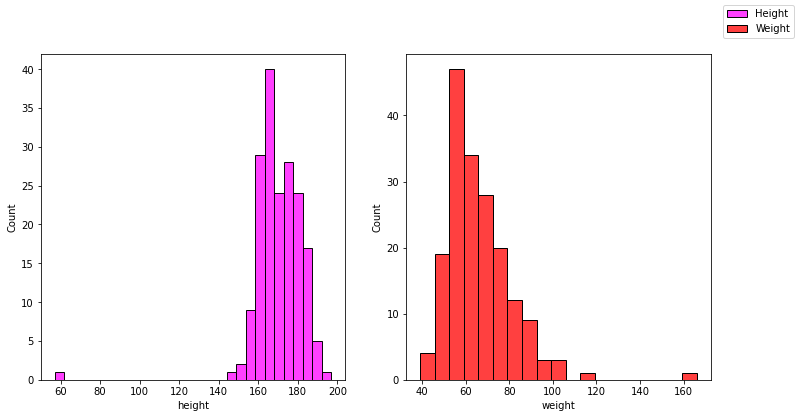

In [64]:
fig, axes = plt.subplots(1,2,figsize = (12,6))
sns.histplot(davis['height'], color='magenta',label='Height',ax = axes[0])
sns.histplot(davis['weight'], color='red',label='Weight',ax = axes[1])
fig.legend()
plt.show()

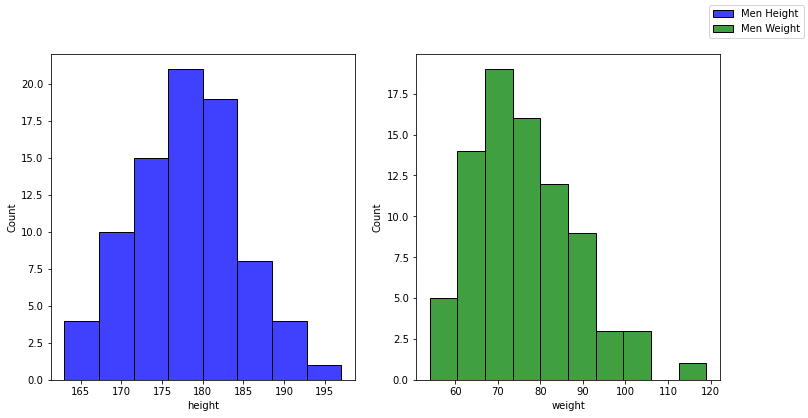

In [68]:
fig, axes = plt.subplots(1,2,figsize = (12,6))
sns.histplot(davis[davis['sex'] == 'M']['height'], color='blue', label='Men Height',ax = axes[0])
sns.histplot(davis[davis['sex'] == 'M']['weight'], color='green', label='Men Weight',ax = axes[1])
fig.legend()
plt.show()

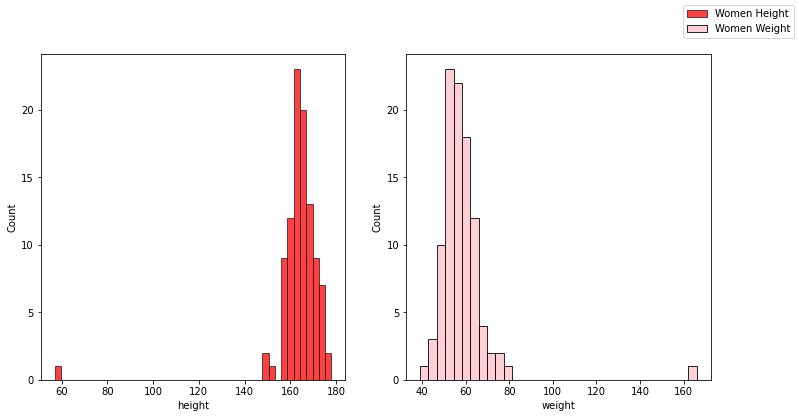

In [69]:
fig, axes = plt.subplots(1,2,figsize = (12,6))
sns.histplot(davis[davis['sex'] == 'F']['height'], color='red', label='Women Height',ax = axes[0])
sns.histplot(davis[davis['sex'] == 'F']['weight'], color='pink', label='Women Weight',ax = axes[1])
fig.legend()
plt.show()

#### 4) На тренировочных данных обучите классификатор пола (sex), используя только признаки height и weight. Замерьте производительность на тренировочной и тестовой выборке (через Accuracy). Рекомендуемые модели:  логистическая регрессия, quadratic discriminant analysis.

In [72]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
train.replace({'M':1,'F':0},inplace = True)
test.replace({'M':1,'F':0},inplace = True)

In [76]:
qda = QuadraticDiscriminantAnalysis()
trainX = train.loc[:,'weight':'height'].to_numpy()
trainY = train['sex'].to_numpy()
qda.fit(trainX,trainY)
print(qda.score(trainX,trainY))

0.8931297709923665


In [80]:
from sklearn.metrics import accuracy_score

In [81]:
testX = test.loc[:,'weight':'height'].to_numpy()
testY = test['sex'].to_numpy()
predicts = qda.predict(testX)
print(accuracy_score(predicts,testY))

0.9


#### 5) Отобразите точки из обучающей выборки на плоскости (height-weight). Покрасьте их цветами в зависимости от пола. Раскрасьте области в зависимости от пола, предсказанного обученным в п.4. классификатором. 

In [125]:
from matplotlib.colors import ListedColormap
class_cmap = ListedColormap(['blue', 'red'])

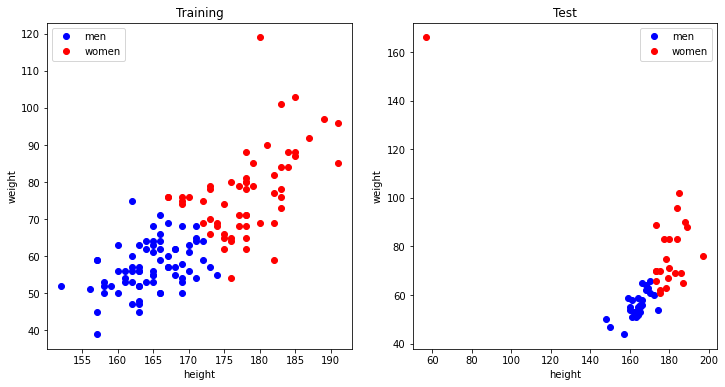

In [146]:
predicts = qda.predict(trainX)
fig, axes = plt.subplots(1,2,figsize = (12,6))
axes[0].plot(trainX[predicts == 0][:,1],trainX[predicts == 0][:,0], 'bo', label = 'men')
axes[0].plot(trainX[predicts == 1][:,1],trainX[predicts == 1][:,0], 'ro', label = 'women')
axes[0].set_ylabel('weight')
axes[0].set_xlabel('height')
axes[0].set_title('Training')
axes[0].legend()

predicts = qda.predict(testX)


axes[1].plot(testX[predicts == 0][:,1],testX[predicts == 0][:,0], 'bo', label = 'men')
axes[1].plot(testX[predicts == 1][:,1],testX[predicts == 1][:,0], 'ro', label = 'women')
axes[1].set_ylabel('weight')
axes[1].set_xlabel('height')
axes[1].set_title('Test')
axes[1].legend()

plt.show()

## Задание 2. Для датасета CCPP.
#### 1) Возьмите данные с листа 1 и выделите валидационную и тестовую выборку.

In [95]:
ccpp = pd.read_excel('Folds5x2_pp.xlsx', sheet_name = 'Sheet1')
print(ccpp.head())

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


In [96]:
train_val, test = train_test_split(ccpp, test_size = 0.2)
train, val = train_test_split(train_val, test_size= 0.2)
print(train.shape,val.shape,test.shape)

(6123, 5) (1531, 5) (1914, 5)


#### 2) Постройте регрессионную модель.  Замерьте коэффициент  и среднюю ошибку предсказания на валидационной выборке.


In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [150]:
lr = LinearRegression()

trainX = train.loc[:, "AT":"RH"].to_numpy()
trainY = train["PE"].to_numpy()
valX = val.loc[:, "AT":"RH"].to_numpy()
valY = val["PE"].to_numpy()
testX = test.loc[:, "AT":"RH"].to_numpy()
testY = test["PE"].to_numpy()

In [156]:
lr.fit(trainX,trainY)
print('r2 score = ',lr.score(valX,valY))
predVal = lr.predict(valX)
print('mse = ', mean_squared_error(predVal,valY))

r2 score =  0.9276195032966283
mse =  21.154465400277488


#### 3) Постройте точки из валидационной выборки на плоскости ($t$ =истинное значение, $y$ =предсказание модели). Отобразите вместе с ними прямую $y=t$. 


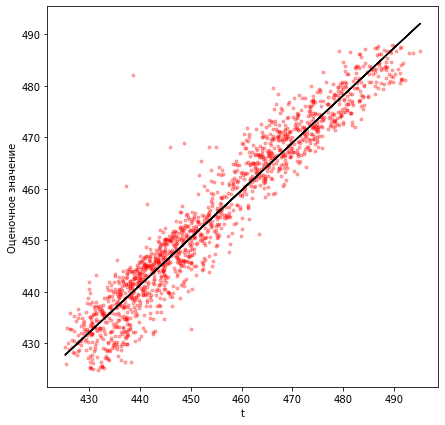

In [168]:
fig, ax = plt.subplots(1,1,figsize = (7,7))
k,b =np.polyfit(valY, predVal, 1)
ax.plot(valY, predVal,'r.', alpha=0.3)
ax.plot(valY, k*valY + b,'-k')
ax.set_xlabel('t')
ax.set_ylabel('Оценочное значение')
plt.show()